In [1]:
!pip install missingno

In [2]:
!pip freeze

alabaster==0.7.12
altair==3.1.0
anaconda-client==1.7.2
anaconda-navigator==1.9.6
anaconda-project==0.8.2
asn1crypto==0.24.0
astroid==2.1.0
astropy==3.1
atomicwrites==1.2.1
attrs==18.2.0
Babel==2.6.0
backcall==0.1.0
backports.os==0.1.1
backports.shutil-get-terminal-size==1.0.0
beautifulsoup4==4.6.3
bitarray==0.8.3
bkcharts==0.2
blaze==0.11.3
bleach==3.0.2
bokeh==1.0.2
boto==2.49.0
Bottleneck==1.2.1
branca==0.3.1
certifi==2018.11.29
cffi==1.11.5
chardet==3.0.4
Click==7.0
cloudpickle==0.6.1
clyent==1.2.2
colorama==0.4.1
comtypes==1.1.7
conda==4.7.5
conda-build==3.17.6
conda-package-handling==1.3.10
conda-verify==3.1.1
contextlib2==0.5.5
cryptography==2.4.2
cycler==0.10.0
Cython==0.29.2
cytoolz==0.9.0.1
dask==1.0.0
datashape==0.5.4
decorator==4.3.0
defusedxml==0.5.0
distributed==1.25.1
docutils==0.14
entrypoints==0.2.3
et-xmlfile==1.0.1
fastcache==1.0.2
filelock==3.0.10
Flask==1.0.2
Flask-Cors==3.0.7
folium==0.9.1
future==0.17.1
gevent==1.3.7
glob2==0.6
greenlet==0.4.15
h5py==2.8.0
heapdic

In [3]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
%matplotlib inline
from calendar import day_name

In [4]:
# importing datasheet 
df_station = pd.read_csv('example_sprit_cut_station.csv', sep=';')
df_prices = pd.read_csv('example_sprit_cut_prices.csv',sep=';')

In [5]:
df_station.head()

,ID,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,d37bee76-91b6-485a-b974-24f1b0d391fa,4,2015-01-09 10:26:15.000000,Aral Tankstelle,ARAL,An der Tagweide,2,76139,Karlsruhe,\N,49.020280,8.459429
1,51d4b652-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET MANNHEIM UNTERMUEHLAUSTRASSE 83,JET,UNTERMUEHLAUSTRASSE 83,\N,68169,MANNHEIM,\N,49.508962,8.467691
2,c7caf231-0e47-40db-92de-9349a2eb2bef,4,2014-09-26 13:24:57.000000,Aral Tankstelle,ARAL,Trippstadter Straße,69,67663,Kaiserslautern,\N,49.433754,7.757465
3,51d4b53b-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET KAISERSLAUTERN PARISER STR. 167,JET,PARISER STR. 167,\N,67655,KAISERSLAUTERN,\N,49.442200,7.748360
4,51d4b70f-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET GERMERSHEIM MUENCHENER STRASSE 12,JET,MUENCHENER STRASSE 12,\N,76726,GERMERSHEIM,\N,49.226800,8.374400


In [6]:
df_station.describe()

,VERSION,LAT,LNG
count,824.000000,824.000000,824.000000
mean,131.427184,49.322226,8.191227
std,269.682766,0.254722,0.283228
min,1.000000,48.800790,7.505350
25%,1.000000,49.106052,8.106655
50%,4.000000,49.374500,8.289707
75%,22.250000,49.509410,8.404923
max,881.000000,49.799397,8.499941


In [7]:
df_prices.head()

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01.000000,21
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01.000000,21
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02 09:06:01.000000,1
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539,1499,1339,2014-10-03 12:14:01.000000,21
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529,1489,1329,2014-10-03 14:14:01.000000,21


In [8]:
df_prices.describe()

,E5,E10,DIESEL,CHANGED
count,2.189526e+06,2.189526e+06,2.189526e+06,2.189526e+06
mean,1.434320e+03,1.404088e+03,1.247491e+03,1.871165e+01
std,2.091502e+02,2.116844e+02,1.037774e+02,8.031150e+00
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00
25%,1.379000e+03,1.349000e+03,1.169000e+03,2.100000e+01
50%,1.459000e+03,1.429000e+03,1.239000e+03,2.100000e+01
75%,1.529000e+03,1.499000e+03,1.324000e+03,2.100000e+01
max,9.999000e+03,9.999000e+03,1.129000e+04,6.300000e+01


# Data Cleaning

In [9]:
#Function to drop records of negative prices of different fuels
def negativ_drop(col_name):
    col_neg = df_prices[df_prices[col_name]<=0]
    df_prices.drop(col_neg.index,axis=0,inplace=True)

In [10]:
negativ_drop('E5')
negativ_drop('E10')
negativ_drop('DIESEL')

In [11]:
df_prices.describe()

,E5,E10,DIESEL,CHANGED
count,2.150850e+06,2.150850e+06,2.150850e+06,2.150850e+06
mean,1.457085e+03,1.429118e+03,1.247725e+03,1.900296e+01
std,1.045052e+02,9.922575e+01,1.024969e+02,7.726614e+00
min,8.000000e+00,1.000000e+03,9.990000e+02,1.000000e+00
25%,1.379000e+03,1.359000e+03,1.169000e+03,2.100000e+01
50%,1.459000e+03,1.430000e+03,1.239000e+03,2.100000e+01
75%,1.529000e+03,1.499000e+03,1.319000e+03,2.100000e+01
max,9.999000e+03,9.999000e+03,1.129000e+04,6.300000e+01


In [12]:
df_station.BRAND.unique()

array(['ARAL', 'JET', 'Supermarkt-Tankstelle am real- Markt',
       'Tankhof Iffezheim', 'Schiffer & Nicklaus GmbH', nan,
       'Sefrin Heizöl & Kraftstoffe', 'bft', 'Markant', 'AVIA',
       'nicht mehr aktiv', 'Bft', 'Freie Tankstelle',
       'AUTO ZOTZ Landau in der Pfalz   Tanken und waschen', 'HEM',
       'Fritz Walter GmbH', 'TAMOIL', 'Freie', 'rnt', '\\N',
       'Schuster & Sohn KG', 'Raiffeisen', 'E Center',
       'Eberhardt Jöhlingen', 'BFT', 'Agip', 'Winkler',
       'Mr. Wash Autoservice AG', 'ESSO', 'ZG Raiffeisen Energie',
       'Supermarkt-Tankstelle', 'freie Tankstelle', 'CLASSIC', 'Shell',
       'Supermarkt Tankstelle', 'Raiffeisen Tankstelle', 'Preis', 'mtb',
       'Tankcenter', 'TS ARNT', 'frei', 'OMV', 'Frühmesser GmbH', 'OIL!',
       'SB Markt', 'SB', 'TOTAL', 'ED', 'SB-Markttankstelle',
       'AUTO ZOTZ Herxheim b.LD.       Tanken an L.493', 'Total',
       'Markenfreie TS', 'TOP', 'T', 'ELAN', 'Tankstelle Heinz'],
      dtype=object)

In [13]:
df_station.BRAND.unique().shape

(56,)

In [14]:
# cleaning BRANDS COLUMN
inactiv_brands=df_station[df_station['BRAND']=='nicht mehr aktiv']

In [15]:
df_station.drop(inactiv_brands.index,axis=0,inplace=True)

In [16]:
df_station.BRAND.unique().shape

(55,)

In [17]:
# filling with no brand
df_station['BRAND'].fillna(value='No Brand',inplace=True)

In [18]:
# filling "//N" values with "No Brand"
df_station['BRAND'].replace(to_replace=['\\N'],value='No Brand',inplace=True)

In [19]:
# Cleaning brands
df_station['BRAND'].replace(to_replace=['Supermarkt-Tankstelle','Supermarkt-Tankstelle am real- Markt'],value='Supermarkt Tankstelle',inplace=True)

In [20]:
df_station['BRAND'].replace(to_replace=['frei','freie Tankstelle','Freie','Freie Tankstelle'],value='FREIE',inplace=True)
df_station['BRAND'].replace(to_replace=['TOTAL', 'Total'],value='TOTAL',inplace=True)
df_station['BRAND'].replace(to_replace=['Bft','bft','BFT'],value='BFT',inplace=True)
df_station['BRAND'].replace(to_replace=['Raiffeisen','Raiffeisen Tankstelle'],value='Raiffeisen',inplace=True)

In [21]:
df_station.BRAND.unique().shape

(45,)

In [22]:
# renaming column ID to STID
df_station.rename(columns={'ID':'STID'}, inplace=True)

In [23]:
df_station.head()

,STID,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,d37bee76-91b6-485a-b974-24f1b0d391fa,4,2015-01-09 10:26:15.000000,Aral Tankstelle,ARAL,An der Tagweide,2,76139,Karlsruhe,\N,49.020280,8.459429
1,51d4b652-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET MANNHEIM UNTERMUEHLAUSTRASSE 83,JET,UNTERMUEHLAUSTRASSE 83,\N,68169,MANNHEIM,\N,49.508962,8.467691
2,c7caf231-0e47-40db-92de-9349a2eb2bef,4,2014-09-26 13:24:57.000000,Aral Tankstelle,ARAL,Trippstadter Straße,69,67663,Kaiserslautern,\N,49.433754,7.757465
3,51d4b53b-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET KAISERSLAUTERN PARISER STR. 167,JET,PARISER STR. 167,\N,67655,KAISERSLAUTERN,\N,49.442200,7.748360
4,51d4b70f-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET GERMERSHEIM MUENCHENER STRASSE 12,JET,MUENCHENER STRASSE 12,\N,76726,GERMERSHEIM,\N,49.226800,8.374400


In [24]:
# merging both dataset by STID column
df_merge= pd.merge(df_prices,df_station, on='STID')

In [25]:
df_merge.head()

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01.000000,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01.000000,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01.000000,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01.000000,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02 09:06:01.000000,1,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847


In [26]:
df_merge.shape

(4301676, 17)

In [27]:
df_merge.drop_duplicates(inplace=True)

In [28]:
df_merge.shape

(1075419, 17)

In [29]:
df_merge['DATE_CHANGED']=pd.to_datetime(df_merge.DATE_CHANGED)

In [30]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1075419 entries, 0 to 4300228
Data columns (total 17 columns):
STID                         1075419 non-null object
E5                           1075419 non-null int64
E10                          1075419 non-null int64
DIESEL                       1075419 non-null int64
DATE_CHANGED                 1075419 non-null datetime64[ns]
CHANGED                      1075419 non-null int64
VERSION                      1075419 non-null int64
VERSION_TIME                 1075419 non-null object
NAME                         1075419 non-null object
BRAND                        1075419 non-null object
STREET                       1072500 non-null object
HOUSE_NUMBER                 849097 non-null object
POST_CODE                    1072500 non-null object
PLACE                        1072500 non-null object
PUBLIC_HOLIDAY_IDENTIFIER    1075419 non-null object
LAT                          1075419 non-null float64
LNG                          1075419

In [31]:
# filling the BRAND column with NAME where BRAND data is not available
df_merge['BRAND']=np.where(df_merge['BRAND']== 'No Brand', df_merge['NAME'], df_merge['BRAND'])

In [32]:
# getting min and max date for BRAND
brand_min_date=df_merge.groupby('BRAND')['DATE_CHANGED'].min().reset_index()
brand_max_date=df_merge.groupby('BRAND')['DATE_CHANGED'].max().reset_index()

In [33]:
# calculating difference between min and max date for each BRAND
min_date=brand_min_date['DATE_CHANGED']
max_date=brand_max_date['DATE_CHANGED']
no_days=max_date-min_date
days=no_days.apply(lambda x: x.days)

In [34]:
df_merge['Days Count'] = days

In [35]:
df_merge.head()

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG,Days Count
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847,478.0
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847,477.0
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02 09:06:01,1,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847,478.0
6,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539,1499,1339,2014-10-03 12:14:01,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847,478.0
8,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529,1489,1329,2014-10-03 14:14:01,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847,478.0


In [36]:
brands = df_merge[['BRAND','Days Count']]

In [37]:
brand_min_date.DATE_CHANGED=days

In [38]:
brand_min_date.head()

,BRAND,DATE_CHANGED
0,ARAL,478
1,AUTO ZOTZ Herxheim b.LD. Tanken an L.493,477
2,AUTO ZOTZ Landau in der Pfalz Tanken und was...,477
3,AVIA,478
4,Agip,478


In [39]:
brand_min_date.rename(columns={'DATE_CHANGED':'Days Count'}, inplace=True)

In [40]:
brand_min_date.head

<bound method NDFrame.head of                                                 BRAND  Days Count
0                                                ARAL         478
1      AUTO ZOTZ Herxheim b.LD.       Tanken an L.493         477
2   AUTO ZOTZ Landau in der Pfalz   Tanken und was...         477
3                                                AVIA         478
4                                                Agip         478
5                                                 BFT         478
6                                             CLASSIC         478
7                             Dudenhöffer & Rung GmbH         477
8                                            E Center         478
9                                                  ED         478
10                                               ELAN         478
11                                               ESSO         478
12                  Eberhardt Hardeckstraße Karlsruhe         477
13                                Eberhardt Jö

# 1. How many different brands exist in the data set and what is the existing history in days (bar chart)?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55]), <a list of 56 Text yticklabel objects>)

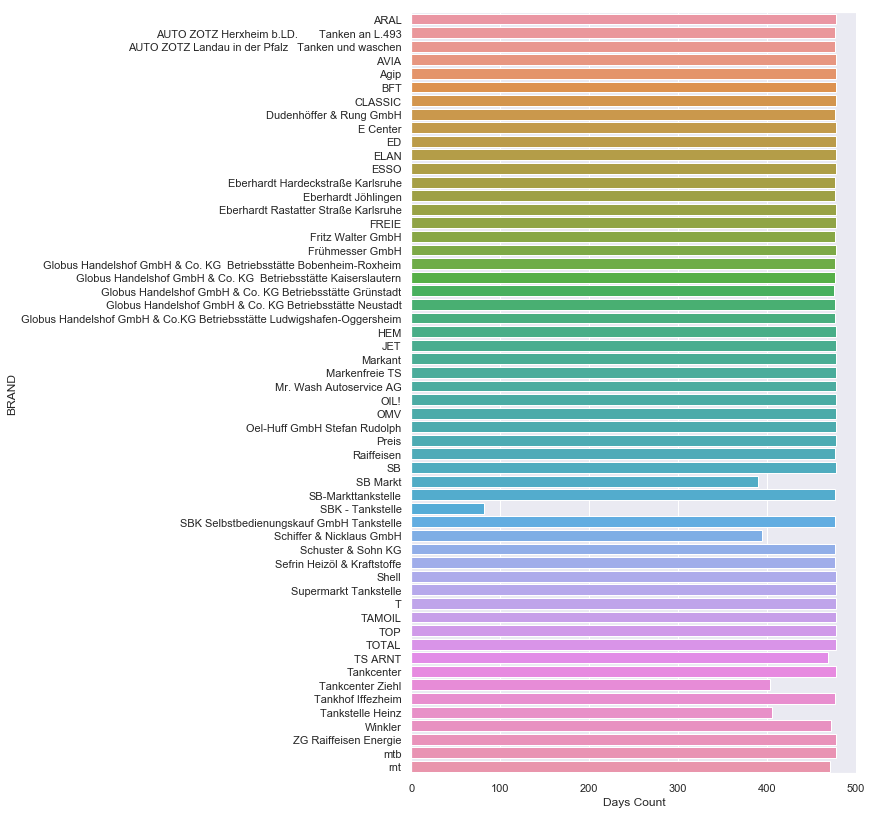

In [41]:
sns.set(rc={'figure.figsize':(8,14)})
q1=sns.barplot(x="Days Count",y="BRAND",data=brand_min_date)
plt.yticks(rotation=360)

In [42]:
brand_min_date.BRAND.unique().shape

(56,)

# There are in all 45 different Brands

# 2. What is the min, mean, max price for each gasoline type weekly (time series graph)

In [43]:
gasoline = df_merge[['STID','E5','E10','DIESEL','DATE_CHANGED','BRAND','Days Count']]

In [44]:
gasoline.head()

,STID,E5,E10,DIESEL,DATE_CHANGED,BRAND,Days Count
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01,ESSO,478.0
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01,ESSO,477.0
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02 09:06:01,ESSO,478.0
6,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539,1499,1339,2014-10-03 12:14:01,ESSO,478.0
8,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529,1489,1329,2014-10-03 14:14:01,ESSO,478.0


In [45]:
df_outliers=df_merge

In [46]:
# function to remove the outliers
def remove_outliers(y):
    data_mean, data_std= df_outliers[y].mean(),df_outliers[y].std()
    cut_off=data_std*3
    lower,upper= data_mean- cut_off, data_mean+cut_off
    df_outliers[y]=np.where(np.logical_or(df_outliers[y]<lower,df_outliers[y]>upper),df_outliers[y].median(),df_outliers[y])

In [47]:
remove_outliers('E5')
remove_outliers('E10')
remove_outliers('DIESEL')

# Time Series graph showing min, mean and max prices weakly for E5

Text(0, 0.5, 'Price in Cents')

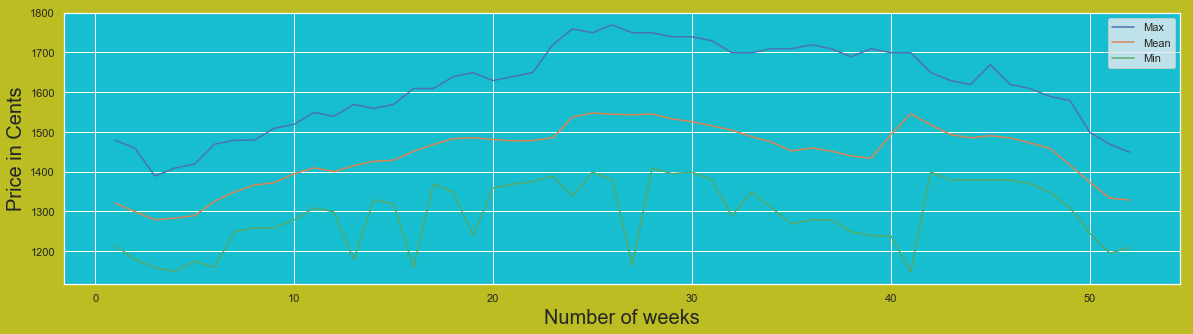

In [48]:
plt.figure(figsize=(20,5), facecolor = "#bcbd22")
#plt.style.use('dark_background')
ax=plt.axes()
ax.set_facecolor("#17becf")
plt.plot(lw=20,linestyle='--')
max_plot_e5 = df_outliers.groupby(df_outliers.DATE_CHANGED.dt.week).E5.max().plot(label='Max')
mean_plot_e5 = df_outliers.groupby(df_outliers.DATE_CHANGED.dt.week).E5.mean().plot(label='Mean')
min_plot_e5 = df_outliers.groupby(df_outliers.DATE_CHANGED.dt.week).E5.min().plot(label='Min')
plt.legend(loc='upper right')
plt.xlabel('Number of weeks', fontsize=20)
plt.ylabel('Price in Cents', fontsize=20)

# Time Series graph showing min, mean and max prices weakly for E10

Text(0, 0.5, 'Price in Cents')

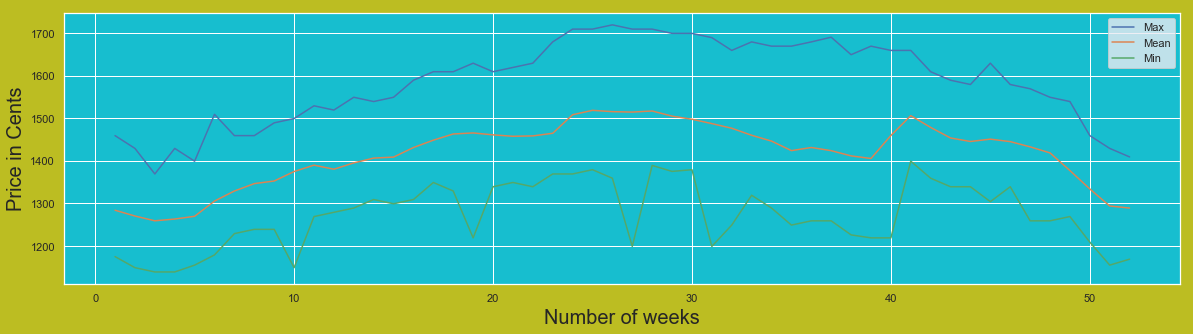

In [49]:
plt.figure(figsize=(20,5), facecolor = "#bcbd22")
ax=plt.axes()
ax.set_facecolor("#17becf")
max_plot_e10 = df_outliers.groupby(df_outliers.DATE_CHANGED.dt.week).E10.max().plot(label='Max')
mean_plot_e10 = df_outliers.groupby(df_outliers.DATE_CHANGED.dt.week).E10.mean().plot(label='Mean')
min_plot_e10 = df_outliers.groupby(df_outliers.DATE_CHANGED.dt.week).E10.min().plot(label='Min')
plt.legend(loc='upper right')
plt.xlabel('Number of weeks', fontsize=20)
plt.ylabel('Price in Cents', fontsize=20)

# Time Series graph showing min, mean and max prices weakly for Diesel

Text(0, 0.5, 'Price in Cents')

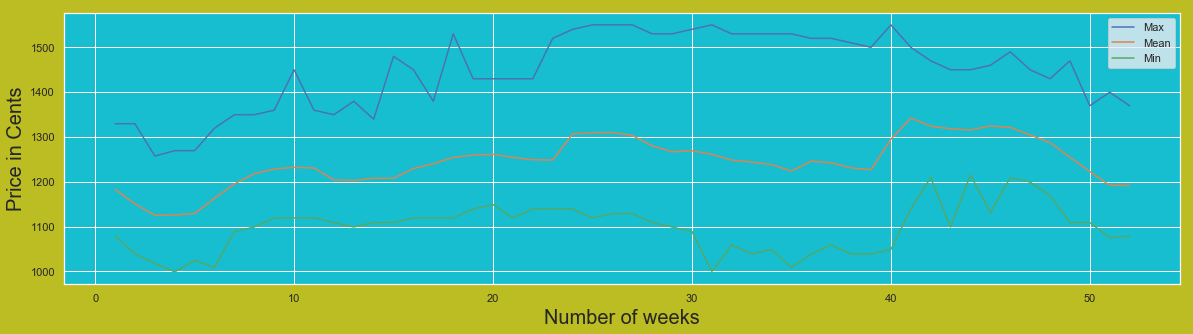

In [50]:
plt.figure(figsize=(20,5), facecolor = "#bcbd22")
ax=plt.axes()
ax.set_facecolor("#17becf")
max_plot_e10 = df_outliers.groupby(df_outliers.DATE_CHANGED.dt.week).DIESEL.max().plot(label='Max')
mean_plot_e10 = df_outliers.groupby(df_outliers.DATE_CHANGED.dt.week).DIESEL.mean().plot(label='Mean')
min_plot_e10 = df_outliers.groupby(df_outliers.DATE_CHANGED.dt.week).DIESEL.min().plot(label='Min')
plt.legend(loc='upper right')
plt.xlabel('Number of weeks', fontsize=20)
plt.ylabel('Price in Cents', fontsize=20)

# 3.What is cheapest station (in average), why is it the cheapest

In [51]:
# Sorting the values of E5, E10 and Diesel as per station ID
station_E5=df_outliers.groupby('STID')[['E5','BRAND','NAME','DATE_CHANGED']].min().sort_values(by='E5').reset_index()
station_E10=df_outliers.groupby('STID')[['E10','BRAND','NAME','DATE_CHANGED']].min().sort_values(by='E10').reset_index()
station_Diesel=df_outliers.groupby('STID')[['DIESEL','BRAND','NAME','DATE_CHANGED']].min().sort_values(by='DIESEL').reset_index()

In [52]:
station_E5.head()

,STID,E5,BRAND,NAME,DATE_CHANGED
0,8884eb23-71e2-477f-b07a-1085619e7063,1148.0,FREIE,Tankhof Wiebelskircher,2014-06-09 00:02:01
1,e1a15081-25b6-9107-e040-0b0a3dfe563c,1149.0,HEM,Ludwigshafen Industriestr. 51,2014-06-08 09:50:01
2,400ce1d0-e095-47dd-a0fc-6073edd7c8d2,1159.0,Globus Handelshof GmbH & Co.KG Betriebsstätte ...,Globus Handelshof GmbH & Co.KG Betriebsstätte ...,2014-06-09 00:02:01
3,a3c6ca46-73ea-4adf-a36b-0334c0ff6472,1159.0,OMV,Waldbronn Ettlinger Strasse 2,2014-06-08 09:50:01
4,2d74b7b9-b9fe-483a-84fd-a1aabd59079b,1159.0,BFT,bft- Tankstelle Maier Landau,2014-06-08 09:50:01


Cheapest Station for E5 is "Tankhof Wiebelskircher" of Brand "FREIE"

In [53]:
station_E10.head()

,STID,E10,BRAND,NAME,DATE_CHANGED
0,400ce1d0-e095-47dd-a0fc-6073edd7c8d2,1139.0,Globus Handelshof GmbH & Co.KG Betriebsstätte ...,Globus Handelshof GmbH & Co.KG Betriebsstätte ...,2014-06-09 00:02:01
1,51d4b69f-a095-1aa0-e100-80009459e03a,1139.0,Supermarkt Tankstelle,Supermarkt-Tankstelle LUDWIGSHAFEN OGGERSHEIM ...,2014-06-08 09:50:01
2,e1a15081-25b6-9107-e040-0b0a3dfe563c,1139.0,HEM,Ludwigshafen Industriestr. 51,2014-06-08 09:50:01
3,51d4b4e4-a095-1aa0-e100-80009459e03a,1149.0,JET,JET LUDWIGSHAFEN MANNHEIMER STRASSE 61,2014-06-08 09:50:01
4,f35ba2a2-964a-43ce-af2b-d22a6b0d53c9,1149.0,BFT,Blankenloch,2014-06-09 00:02:01


Cheapest Station for E10 is Globus Handelshof GmbH & Co.KG Betriebsstätte

In [54]:
station_Diesel.head()

,STID,DIESEL,BRAND,NAME,DATE_CHANGED
0,e1a15081-25b6-9107-e040-0b0a3dfe563c,999.0,HEM,Ludwigshafen Industriestr. 51,2014-06-08 09:50:01
1,51d4b4e4-a095-1aa0-e100-80009459e03a,999.0,JET,JET LUDWIGSHAFEN MANNHEIMER STRASSE 61,2014-06-08 09:50:01
2,51d4b69f-a095-1aa0-e100-80009459e03a,999.0,Supermarkt Tankstelle,Supermarkt-Tankstelle LUDWIGSHAFEN OGGERSHEIM ...,2014-06-08 09:50:01
3,400ce1d0-e095-47dd-a0fc-6073edd7c8d2,999.0,Globus Handelshof GmbH & Co.KG Betriebsstätte ...,Globus Handelshof GmbH & Co.KG Betriebsstätte ...,2014-06-09 00:02:01
4,f0a63434-d85b-4a06-a583-11724f884450,1000.0,Agip,BIETIGHEIM - BADENSTR. 6,2014-06-08 09:50:01


Cheapest station for Diesel is "Ludwigshafen Industriestr. 51" of Brand "HEM"

In [55]:
# Merging the station Data for cheap price
x=pd.merge(station_E5,station_E10)

In [56]:
station_mean=pd.merge(x,station_Diesel)

In [57]:
station_mean['mean']=station_mean.mean(axis=1)

In [58]:
station_mean.sort_values(by='mean').head()

,STID,E5,BRAND,NAME,DATE_CHANGED,E10,DIESEL,mean
1,e1a15081-25b6-9107-e040-0b0a3dfe563c,1149.0,HEM,Ludwigshafen Industriestr. 51,2014-06-08 09:50:01,1139.0,999.0,1095.666667
2,400ce1d0-e095-47dd-a0fc-6073edd7c8d2,1159.0,Globus Handelshof GmbH & Co.KG Betriebsstätte ...,Globus Handelshof GmbH & Co.KG Betriebsstätte ...,2014-06-09 00:02:01,1139.0,999.0,1099.000000
6,51d4b69f-a095-1aa0-e100-80009459e03a,1159.0,Supermarkt Tankstelle,Supermarkt-Tankstelle LUDWIGSHAFEN OGGERSHEIM ...,2014-06-08 09:50:01,1139.0,999.0,1099.000000
8,51d4b4e4-a095-1aa0-e100-80009459e03a,1169.0,JET,JET LUDWIGSHAFEN MANNHEIMER STRASSE 61,2014-06-08 09:50:01,1149.0,999.0,1105.666667
7,e69a923a-ba11-409b-2720-2b908ed66498,1165.0,AUTO ZOTZ Herxheim b.LD. Tanken an L.493,Auto Zotz TK Herxheim,2014-06-09 00:02:01,1155.0,1025.0,1115.000000


# Cheapest station in average is "Ludwigshafen Industriestr. 51" of Brand "HEM"

# 4. At which day of a weak is the price most likely the cheapest (week profile)

In [59]:
day_wavg=df_outliers.groupby(df_outliers.DATE_CHANGED.dt.weekday_name)[['E5','E10','DIESEL']].mean().reset_index()

In [60]:
day_wavg['Mean_Price']=day_wavg.mean(axis=1)

In [61]:
day_wavg

,DATE_CHANGED,E5,E10,DIESEL,Mean_Price
0,Friday,1455.637634,1427.668009,1246.440579,1376.582074
1,Monday,1458.793954,1430.495719,1249.915458,1379.735043
2,Saturday,1454.793504,1427.018182,1245.856266,1375.889317
3,Sunday,1461.109058,1433.627451,1250.780884,1381.839131
4,Thursday,1455.991333,1428.041031,1246.841517,1376.957960
5,Tuesday,1456.923483,1428.941860,1247.273223,1377.712855
6,Wednesday,1456.641937,1428.680306,1247.101392,1377.474545


In [62]:
day_wavg = day_wavg.groupby(['DATE_CHANGED']).sum().reindex(day_name[0:7]) 

In [63]:
day_wavg

,E5,E10,DIESEL,Mean_Price
DATE_CHANGED,,,,
Monday,1458.793954,1430.495719,1249.915458,1379.735043
Tuesday,1456.923483,1428.941860,1247.273223,1377.712855
Wednesday,1456.641937,1428.680306,1247.101392,1377.474545
Thursday,1455.991333,1428.041031,1246.841517,1376.957960
Friday,1455.637634,1427.668009,1246.440579,1376.582074
Saturday,1454.793504,1427.018182,1245.856266,1375.889317
Sunday,1461.109058,1433.627451,1250.780884,1381.839131


In [64]:
day = day_wavg['Mean_Price'].idxmin()

In [65]:
day

'Saturday'

# Fuel prices are cheaper on "Saturday"

# 5. At which hour during a day is the price the cheapest (hour profile)

In [66]:
E5_hour=df_outliers.groupby(df_merge.DATE_CHANGED.dt.hour)['E5'].min()

In [67]:
E5_hour.sort_values()

DATE_CHANGED
9     1148.0
18    1149.0
13    1159.0
12    1159.0
19    1159.0
17    1159.0
10    1159.0
15    1159.0
11    1169.0
16    1169.0
8     1179.0
22    1185.0
14    1189.0
20    1195.0
7     1195.0
21    1199.0
6     1209.0
0     1219.0
23    1219.0
5     1229.0
1     1239.0
3     1249.0
4     1259.0
2     1289.0
Name: E5, dtype: float64

E5 is cheapest at 9th hr of day.

In [68]:
E10_hour=df_outliers.groupby(df_merge.DATE_CHANGED.dt.hour)['E10'].min()

In [69]:
E10_hour.sort_values()

DATE_CHANGED
13    1139.0
12    1139.0
18    1139.0
17    1139.0
11    1149.0
6     1149.0
16    1149.0
19    1149.0
7     1155.0
15    1159.0
9     1159.0
10    1159.0
22    1165.0
8     1165.0
14    1169.0
20    1175.0
21    1179.0
0     1199.0
5     1199.0
23    1199.0
3     1209.0
1     1219.0
4     1229.0
2     1249.0
Name: E10, dtype: float64

E10 is cheapest at 13th hr of day

In [70]:
Diesel_hour=df_outliers.groupby(df_merge.DATE_CHANGED.dt.hour)['DIESEL'].min()

In [71]:
Diesel_hour.sort_values()

DATE_CHANGED
19     999.0
18     999.0
17     999.0
16     999.0
15     999.0
14     999.0
13    1000.0
20    1009.0
10    1009.0
0     1019.0
12    1019.0
23    1019.0
9     1025.0
22    1029.0
11    1029.0
8     1039.0
5     1039.0
21    1039.0
7     1049.0
6     1049.0
4     1059.0
3     1079.0
1     1079.0
2     1109.0
Name: DIESEL, dtype: float64

Diesel is cheapest at 19th hr of day

In [72]:
all_fuel = df_outliers.groupby(df_merge.DATE_CHANGED.dt.hour)[['DIESEL','E5','E10']].min()

In [73]:
all_fuel

,DIESEL,E5,E10
DATE_CHANGED,,,
0,1019.0,1219.0,1199.0
1,1079.0,1239.0,1219.0
2,1109.0,1289.0,1249.0
3,1079.0,1249.0,1209.0
4,1059.0,1259.0,1229.0
5,1039.0,1229.0,1199.0
6,1049.0,1209.0,1149.0
7,1049.0,1195.0,1155.0
8,1039.0,1179.0,1165.0


Text(0, 0.5, 'Prices')

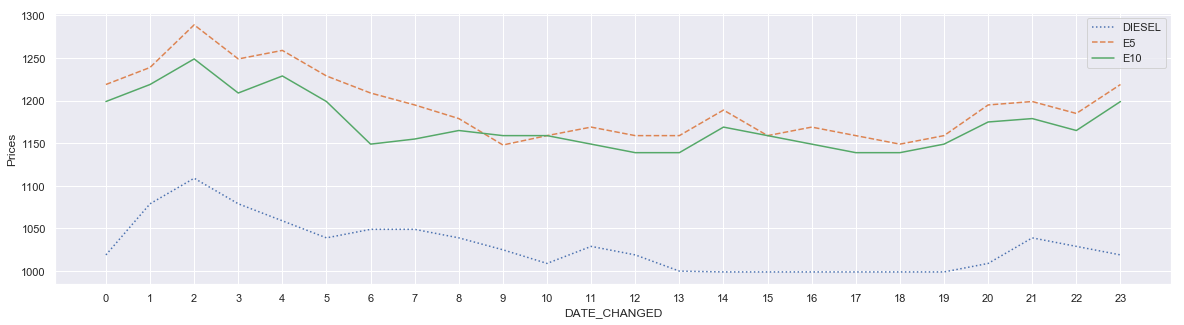

In [74]:
all_fuel.plot(figsize=(20,5),xticks=range(0,24,1), style=[':', '--', '-']);
plt.ylabel('Prices')

# 6. How many different locations are present in the data (visualize via a map)

In [75]:
locations = df_merge[['LAT','LNG']]
locations.drop_duplicates(inplace=True)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [76]:
!pip install folium

In [77]:
import folium
map = folium.Map(location=[49.633409, 8.273847], zoom_start=7)
for point in range(0, len(locations)):
    folium.Marker([locations.iloc[point,0],locations.iloc[point,1]], popup="test").add_to(map)
map

407 different locations present

# 7. What is the gas station which has most price data points, choose one and draw the time series for all 3 gas types

In [78]:
datapoints=df_outliers.BRAND.value_counts()

In [79]:
datapoints.head()

Shell    190298
ARAL     181216
ESSO     119358
AVIA     114336
TOTAL     79207
Name: BRAND, dtype: int64

In [80]:
shell=df_outliers[df_outliers['BRAND']=='Shell']

In [81]:
shell.head()

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG,Days Count
44848,eb39e146-8263-4093-835d-30c8073e2eb2,1399.0,1379.0,1139.0,2015-08-13 14:50:01,21,1,2013-07-31 22:00:00.000000,RAMSTEIN LANDSTUHLER STR.,Shell,LANDSTUHLER STR. 72,NaN,66877,RAMSTEIN,\N,49.440489,7.555197,NaN
44850,eb39e146-8263-4093-835d-30c8073e2eb2,1379.0,1359.0,1139.0,2015-08-13 15:18:01,20,1,2013-07-31 22:00:00.000000,RAMSTEIN LANDSTUHLER STR.,Shell,LANDSTUHLER STR. 72,NaN,66877,RAMSTEIN,\N,49.440489,7.555197,NaN
44852,eb39e146-8263-4093-835d-30c8073e2eb2,1409.0,1389.0,1139.0,2015-08-14 13:14:01,20,1,2013-07-31 22:00:00.000000,RAMSTEIN LANDSTUHLER STR.,Shell,LANDSTUHLER STR. 72,NaN,66877,RAMSTEIN,\N,49.440489,7.555197,NaN
44854,eb39e146-8263-4093-835d-30c8073e2eb2,1399.0,1379.0,1139.0,2015-08-14 13:30:01,20,1,2013-07-31 22:00:00.000000,RAMSTEIN LANDSTUHLER STR.,Shell,LANDSTUHLER STR. 72,NaN,66877,RAMSTEIN,\N,49.440489,7.555197,NaN
44856,eb39e146-8263-4093-835d-30c8073e2eb2,1419.0,1399.0,1169.0,2015-08-15 12:02:01,21,1,2013-07-31 22:00:00.000000,RAMSTEIN LANDSTUHLER STR.,Shell,LANDSTUHLER STR. 72,NaN,66877,RAMSTEIN,\N,49.440489,7.555197,NaN


In [82]:
df_outliers.head()

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG,Days Count
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589.0,1549.0,1389.0,2014-10-02 05:22:01,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847,478.0
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569.0,1529.0,1369.0,2014-10-02 05:26:01,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847,477.0
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569.0,1529.0,1359.0,2014-10-02 09:06:01,1,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847,478.0
6,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539.0,1499.0,1339.0,2014-10-03 12:14:01,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847,478.0
8,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529.0,1489.0,1329.0,2014-10-03 14:14:01,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847,478.0


Text(0, 0.5, 'Price in Cents')

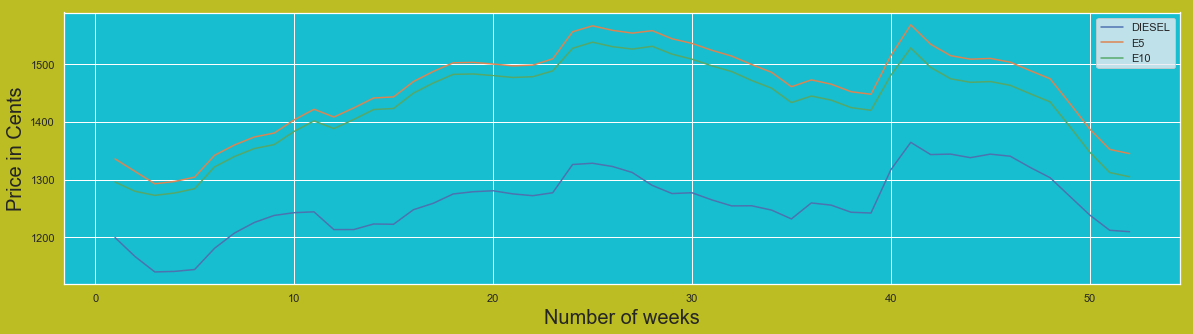

In [83]:
plt.figure(figsize=(20,5), facecolor = "#bcbd22")
ax=plt.axes()
ax.set_facecolor("#17becf")
max_plot_e5 = shell.groupby(shell.DATE_CHANGED.dt.week).DIESEL.mean().plot(label='DIESEL')
mean_plot_e5 = shell.groupby(shell.DATE_CHANGED.dt.week).E5.mean().plot(label='E5')
min_plot_e5 = shell.groupby(shell.DATE_CHANGED.dt.week).E10.mean().plot(label='E10')
plt.legend(loc='upper right')
plt.xlabel('Number of weeks', fontsize=20)
plt.ylabel('Price in Cents', fontsize=20)

"Shell" has highest data points

# 8. At which hour during a day do we have the most price changes

In [84]:
changes_price=df_outliers[['E5','E10','DIESEL','DATE_CHANGED']]

Text(0, 0.5, 'Price chab=nge count')

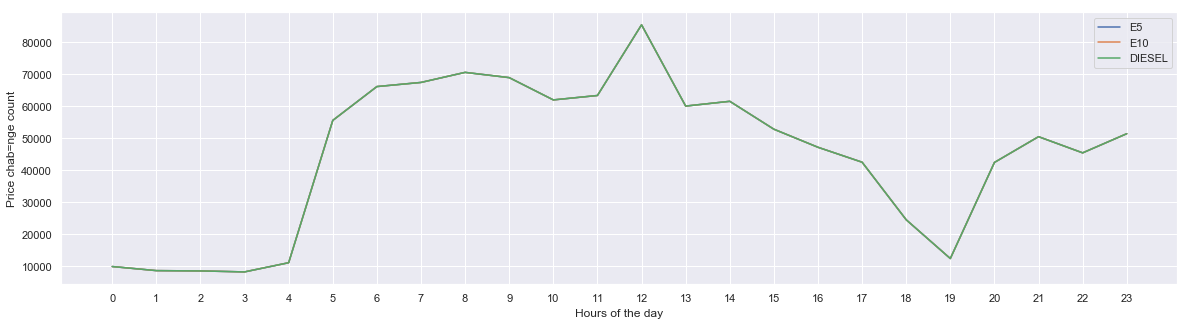

In [85]:
change=changes_price.groupby(changes_price.DATE_CHANGED.dt.hour)['E5','E10','DIESEL'].count()
change.plot(figsize=(20,5),xticks=range(0,24))
plt.xlabel('Hours of the day')
plt.ylabel('Price chab=nge count')

We have most price changes at 12 hr of day.

# 9. Select 20 gas stations having the longest time history and visualize the average price per month. Use heatmap and only the prices between 12:00-13:00 of e10 and diesel.

In [86]:
brand = df_merge.groupby('BRAND')['DATE_CHANGED','E10','DIESEL']

In [87]:
brand_first=brand.min().reset_index()

In [88]:
brand_last=brand.max().reset_index()

In [89]:
time_history = (pd.to_datetime(brand_last['DATE_CHANGED'])-pd.to_datetime(brand_first['DATE_CHANGED'])).dt.days

In [90]:
brand_last['Days_Count'] = time_history

In [91]:
brand_last

,BRAND,DATE_CHANGED,E10,DIESEL,Days_Count
0,ARAL,2015-09-29 23:02:01,1719.0,1539.0,478
1,AUTO ZOTZ Herxheim b.LD. Tanken an L.493,2015-09-29 17:42:01,1609.0,1409.0,477
2,AUTO ZOTZ Landau in der Pfalz Tanken und was...,2015-09-29 15:22:01,1575.0,1395.0,477
3,AVIA,2015-09-29 23:34:01,1669.0,1509.0,478
4,Agip,2015-09-29 23:06:01,1659.0,1479.0,478
5,BFT,2015-09-29 23:30:01,1690.0,1549.0,478
6,CLASSIC,2015-09-29 20:10:01,1609.0,1419.0,478
7,Dudenhöffer & Rung GmbH,2015-09-29 23:26:01,1599.0,1419.0,477
8,E Center,2015-09-29 22:06:01,1639.0,1459.0,478
9,ED,2015-09-29 23:10:01,1619.0,1449.0,478


In [92]:
brand_last['DATE'] = pd.to_datetime(brand_last['DATE_CHANGED'])
brand_last= brand_last.set_index('DATE')

In [93]:
brand_last.head()

,BRAND,DATE_CHANGED,E10,DIESEL,Days_Count
DATE,,,,,
2015-09-29 23:02:01,ARAL,2015-09-29 23:02:01,1719.0,1539.0,478
2015-09-29 17:42:01,AUTO ZOTZ Herxheim b.LD. Tanken an L.493,2015-09-29 17:42:01,1609.0,1409.0,477
2015-09-29 15:22:01,AUTO ZOTZ Landau in der Pfalz Tanken und was...,2015-09-29 15:22:01,1575.0,1395.0,477
2015-09-29 23:34:01,AVIA,2015-09-29 23:34:01,1669.0,1509.0,478
2015-09-29 23:06:01,Agip,2015-09-29 23:06:01,1659.0,1479.0,478


In [94]:
df_brand_group= brand_last.groupby('BRAND')['DATE_CHANGED','Days_Count','E10','DIESEL'].max().reset_index()

In [95]:
df_brand_group.head()

,BRAND,DATE_CHANGED,Days_Count,E10,DIESEL
0,ARAL,2015-09-29 23:02:01,478,1719.0,1539.0
1,AUTO ZOTZ Herxheim b.LD. Tanken an L.493,2015-09-29 17:42:01,477,1609.0,1409.0
2,AUTO ZOTZ Landau in der Pfalz Tanken und was...,2015-09-29 15:22:01,477,1575.0,1395.0
3,AVIA,2015-09-29 23:34:01,478,1669.0,1509.0
4,Agip,2015-09-29 23:06:01,478,1659.0,1479.0


In [96]:
df_brand_days= df_brand_group.groupby('Days_Count')

In [97]:
max_idx = df_brand_days['BRAND'].count().idxmax()
max_idx

478

In [98]:
top_brands_20= (df_brand_days.get_group(max_idx)['BRAND'][:20]).reset_index()

In [99]:
top_brands_20.drop('index',axis=1,inplace=True)

In [100]:
top_brands_20

,BRAND
0,ARAL
1,AVIA
2,Agip
3,BFT
4,CLASSIC
5,E Center
6,ED
7,ELAN
8,ESSO
9,Eberhardt Rastatter Straße Karlsruhe


In [101]:
brands_list=np.ravel(top_brands_20.values)

In [102]:
df_brands_top20 = brand_last[brand_last.BRAND.isin(brands_list)]

In [103]:
df_brands_top20.head()

,BRAND,DATE_CHANGED,E10,DIESEL,Days_Count
DATE,,,,,
2015-09-29 23:02:01,ARAL,2015-09-29 23:02:01,1719.0,1539.0,478
2015-09-29 23:34:01,AVIA,2015-09-29 23:34:01,1669.0,1509.0,478
2015-09-29 23:06:01,Agip,2015-09-29 23:06:01,1659.0,1479.0,478
2015-09-29 23:30:01,BFT,2015-09-29 23:30:01,1690.0,1549.0,478
2015-09-29 20:10:01,CLASSIC,2015-09-29 20:10:01,1609.0,1419.0,478


In [104]:
top_between_12_13 = brand_last.between_time('12:00', '13:00')

In [105]:
top_between_12_13

,BRAND,DATE_CHANGED,E10,DIESEL,Days_Count
DATE,,,,,
2015-09-28 12:14:01,Globus Handelshof GmbH & Co. KG Betriebsstätte...,2015-09-28 12:14:01,1559.0,1369.0,476
2015-09-24 12:18:01,rnt,2015-09-24 12:18:01,1559.0,1389.0,471


In [106]:
top_brands_12_13=top_between_12_13.groupby(top_between_12_13.index.month)['E10','DIESEL'].mean()

In [107]:
top_brands_12_13

,E10,DIESEL
DATE,,
9,1559.0,1379.0


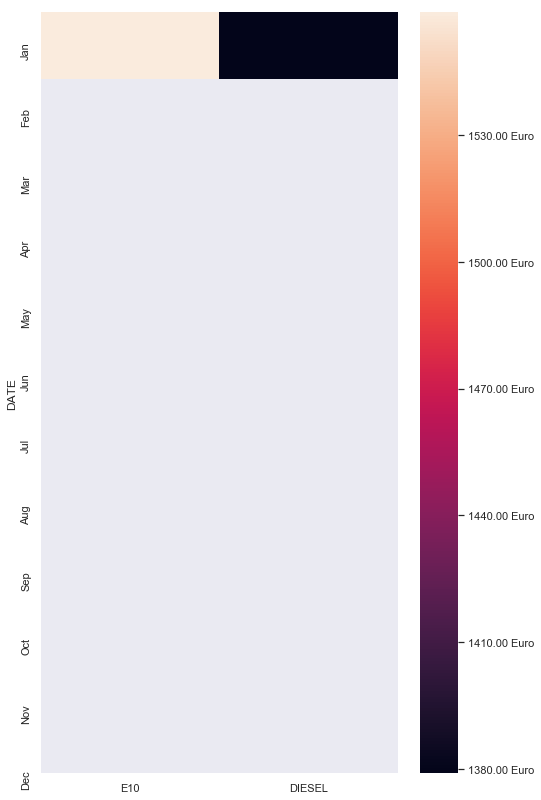

In [108]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
sns.heatmap(top_brands_12_13, cbar_kws={'format': '%1.2f Euro'}, yticklabels=months);

# 10. Describe a possible business potential in € for the customer (textual description in the ipyhton file)

Business Description : The fuel prices are quite fluctuating hence it is necessary to consider different parameters before filling the fuel as it would prove economical.
Different parameters like location, brand, day of the week and time of the day should be taken into consideration as these are the effecting parameters.

The cheapest station in average is "Ludwigshafen Industriestr. 51", so it will be economical to fill fuel at this station.

Try filling fuel on Saturdays as it is cheapest.

E5 is cheapest at 9 hr of day, E10 cheaper at 12 hr of day and diesel is cheaper at 14 hr of day, so it would be preferable to fill fuel at these hrs of day.

Maximum price changes are at 12 hr of day so it is not recommended to fill fuel at this time.